In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [24]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [26]:
class_names[y_train[0]]

'Coat'

In [27]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\EdwinVivekN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()
#28 * 28 = 784 inputs
# 784 * 300 neurons + 300 bias = 235500 params
# 300 neurons * 100 neurons + 100 bias = 30100 params
# 100 neurons * 10 neurons + 10 bias = 1010 params

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>]

In [30]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()  #get the random weights assigned
print(f' Weights - {weights.shape}\n Biases - {biases.shape}')

 Weights - (784, 300)
 Biases - (300,)


In [31]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
#55000 (samples) / 32  (batch size) = 1719 batches

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7018 - loss: 0.9505 - val_accuracy: 0.8310 - val_loss: 0.5030
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8252 - loss: 0.4988 - val_accuracy: 0.8446 - val_loss: 0.4517
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8433 - loss: 0.4522 - val_accuracy: 0.8462 - val_loss: 0.4349
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8547 - loss: 0.4158 - val_accuracy: 0.8654 - val_loss: 0.3944
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8617 - loss: 0.3973 - val_accuracy: 0.8556 - val_loss: 0.4057
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8664 - loss: 0.3819 - val_accuracy: 0.8712 - val_loss: 0.3712
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8701 - loss: 0.3647 - val_accuracy: 0.8654 - val_loss: 0.3775
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8745 - loss: 0.3549 - 

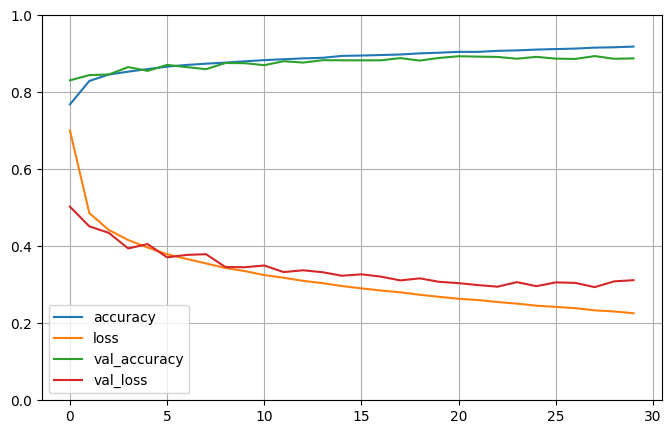

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [34]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8330 - loss: 74.7383


[77.47319030761719, 0.8317999839782715]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [102]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [37]:
print("Prediction:")
for i, _ in enumerate(y_proba):
    print(class_names[np.argmax(y_proba[i])])

y_new = y_test[:3]
print("\nActual:") 
for i in y_new:
    print(class_names[i])

Prediction:
Ankle boot
Pullover
Trouser

Actual:
Ankle boot
Pullover
Trouser


In [133]:
#save and restore
model.save("fashion_mnist.keras")
loaded_model = keras.models.load_model('fashion_mnist.h5')
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,612 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [152]:
#callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint('fashion_mnist_cb.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])


Epoch 1/30
1715/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - loss: 0.9865

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6842 - loss: 0.9857 - val_accuracy: 0.8254 - val_loss: 0.5241
Epoch 2/30
1710/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8231 - loss: 0.5095

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8232 - loss: 0.5094 - val_accuracy: 0.8456 - val_loss: 0.4592
Epoch 3/30
1705/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8402 - loss: 0.4557

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8402 - loss: 0.4556 - val_accuracy: 0.8634 - val_loss: 0.4099
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8479 - loss: 0.4289 - val_accuracy: 0.8588 - val_loss: 0.4124
Epoch 5/30
1711/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8571 - loss: 0.4069

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8571 - loss: 0.4069 - val_accuracy: 0.8686 - val_loss: 0.3828
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8632 - loss: 0.3903 - val_accuracy: 0.8602 - val_loss: 0.3854
Epoch 7/30
1712/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.3692

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8688 - loss: 0.3692 - val_accuracy: 0.8726 - val_loss: 0.3682
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8726 - loss: 0.3594 - val_accuracy: 0.8664 - val_loss: 0.3796
Epoch 9/30
1718/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8768 - loss: 0.3427

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8768 - loss: 0.3427 - val_accuracy: 0.8766 - val_loss: 0.3510
Epoch 10/30
1694/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8785 - loss: 0.3444

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8786 - loss: 0.3443 - val_accuracy: 0.8782 - val_loss: 0.3433
Epoch 11/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8840 - loss: 0.3287 - val_accuracy: 0.8770 - val_loss: 0.3468
Epoch 12/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8846 - loss: 0.3236 - val_accuracy: 0.8788 - val_loss: 0.3439
Epoch 13/30
1701/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8903 - loss: 0.3075

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8903 - loss: 0.3076 - val_accuracy: 0.8832 - val_loss: 0.3324
Epoch 14/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8897 - loss: 0.3097 - val_accuracy: 0.8788 - val_loss: 0.3470
Epoch 15/30
1713/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8917 - loss: 0.2985

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8917 - loss: 0.2985 - val_accuracy: 0.8840 - val_loss: 0.3224
Epoch 16/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8962 - loss: 0.2874 - val_accuracy: 0.8800 - val_loss: 0.3293
Epoch 17/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8955 - loss: 0.2903 - val_accuracy: 0.8814 - val_loss: 0.3337
Epoch 18/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8990 - loss: 0.2802 - val_accuracy: 0.8790 - val_loss: 0.3327
Epoch 19/30
1697/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8992 - loss: 0.2786

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8992 - loss: 0.2786 - val_accuracy: 0.8896 - val_loss: 0.3079
Epoch 20/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9040 - loss: 0.2684 - val_accuracy: 0.8812 - val_loss: 0.3313
Epoch 21/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9027 - loss: 0.2717 - val_accuracy: 0.8892 - val_loss: 0.3115
Epoch 22/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9072 - loss: 0.2611 - val_accuracy: 0.8896 - val_loss: 0.3100
Epoch 23/30
1691/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9073 - loss: 0.2595

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9073 - loss: 0.2594 - val_accuracy: 0.8906 - val_loss: 0.3013
Epoch 24/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9099 - loss: 0.2504 - val_accuracy: 0.8880 - val_loss: 0.3119
Epoch 25/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9094 - loss: 0.2502 - val_accuracy: 0.8932 - val_loss: 0.3020
Epoch 26/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9103 - loss: 0.2462

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9103 - loss: 0.2462 - val_accuracy: 0.8962 - val_loss: 0.2945
Epoch 27/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9161 - loss: 0.2357 - val_accuracy: 0.8908 - val_loss: 0.3140
Epoch 28/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9157 - loss: 0.2357 - val_accuracy: 0.8940 - val_loss: 0.2966
Epoch 29/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9168 - loss: 0.2291 - val_accuracy: 0.8900 - val_loss: 0.3045
Epoch 30/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9200 - loss: 0.2255 - val_accuracy: 0.8914 - val_loss: 0.2956


In [161]:
#Tensorboard
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
     import time
     run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
     return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])
 

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6796 - loss: 0.9878 - val_accuracy: 0.8394 - val_loss: 0.4931
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8233 - loss: 0.5087 - val_accuracy: 0.8376 - val_loss: 0.4661
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8416 - loss: 0.4488 - val_accuracy: 0.8558 - val_loss: 0.4189
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8504 - loss: 0.4242 - val_accuracy: 0.8580 - val_loss: 0.4101
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8595 - loss: 0.3983 - val_accuracy: 0.8566 - val_loss: 0.3950
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8657 - loss: 0.3801 - val_accuracy: 0.8694 - val_loss: 0.3753
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8676 - loss: 0.3699 - val_accuracy: 0.8664 - val_loss: 0.3795
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8742 - loss: 0.3566 -

## XOR Neural networks

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

xor_model = keras.models.Sequential([
    keras.layers.InputLayer(shape=[2]),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
xor_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(xor_model, to_file="xor_model.png", show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [6]:
xor_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
xor_model.fit(X, y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step - accuracy: 0.5000 - loss: 0.6766
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.6759
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 0.6752
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.6746


C:\Users\EdwinVivekN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.6739
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.6732
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.6726
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 0.6719
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 0.6713
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.6706
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.6700
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 0.6694
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.6687
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5000 - loss: 0.6681
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5000 - loss: 0.6675
Epoch 16/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accur

In [7]:
# Evaluate
loss, acc = xor_model.evaluate(X, y)
print("Accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 1.0000 - loss: 0.2055
Accuracy: 1.0


In [8]:
predictions = xor_model.predict(X)
print("\nPredictions:")
print(np.round(predictions)) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step

Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


In [41]:
X = tf.range(10) # any data tensor
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [42]:
for i in dataset:
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
